In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df_trainingdata = pd.read_csv("distance_fare_data.csv")

In [3]:
df_trainingdata.head()

,Distance_km,Fare_price
0,37.454012,57.780894
1,95.071431,148.768414
2,73.199394,116.264454
3,59.865848,91.227016
4,15.601864,37.731669


In [4]:
distance_array = np.array(df_trainingdata["Distance_km"])

In [5]:
fare_array = np.array(df_trainingdata["Fare_price"])

In [6]:
def prediction(feature, weight, bias):
    y_hat = (weight*feature) + bias
    return y_hat

In [7]:
def Error_calc(Weight,bias):
    total_error = 0
    for i in range(np.size(fare_array)):
        Y_hat =  prediction(distance_array[i],Weight,bias)
        squarred_error = math.pow(fare_array[i] - Y_hat,2)
        total_error += squarred_error
    return total_error/(2*np.size(fare_array))

In [8]:
def stochastic_gradient_descent(iterations=200000,learning_rate = 0.0001):
    Weight = 2.52
    bias = 0.5
    m = np.size(fare_array)
    indicies = np.arange(m)
    np.random.shuffle(indicies)
    errors = []

    for i in range(iterations):
        x = np.random.choice(indicies)
        y_hat = prediction(distance_array[x], Weight, bias)
        dw = ((y_hat - fare_array[x])*distance_array[x]) / m
        db = (y_hat - fare_array[x]) / m
        Weight = Weight - learning_rate * dw
        bias = bias - learning_rate * db
        if i % 25000 == 0:
            error = Error_calc(Weight, bias)
            errors.append((i, error))
        if i%25000==0:
            print(f"Cost after iteration {i} is {error}")
    x_line,y_line = zip(*errors)
    sns.lineplot(x = x_line, y = y_line,color = "red",label= "error after every 25000 step")
    plt.xlabel("number of iterations")
    plt.ylabel("error")
    plt.title("error after every 25000 SGD step")
    plt.show()
    return Weight,bias

Cost after iteration 0 is 1444.6506363421402
Cost after iteration 25000 is 15.107087297441662
Cost after iteration 50000 is 15.053790807020283
Cost after iteration 75000 is 15.041363622878196
Cost after iteration 100000 is 15.011373064255892
Cost after iteration 125000 is 15.0162995052645
Cost after iteration 150000 is 14.96397844641901
Cost after iteration 175000 is 14.946205565334232


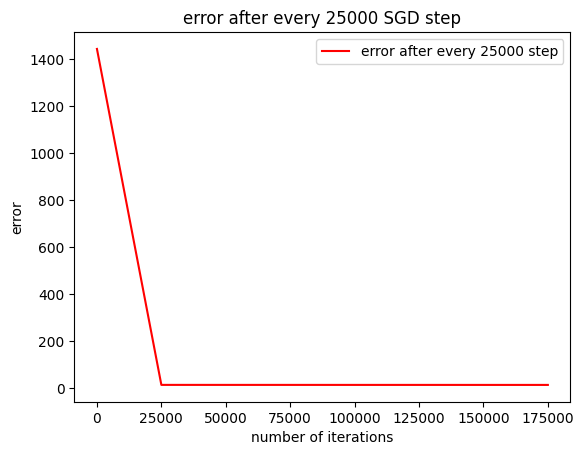

1.5727045479363368 0.6200887376391261


In [9]:
optimized_weight, optimized_bias = stochastic_gradient_descent()
print(optimized_weight, optimized_bias)

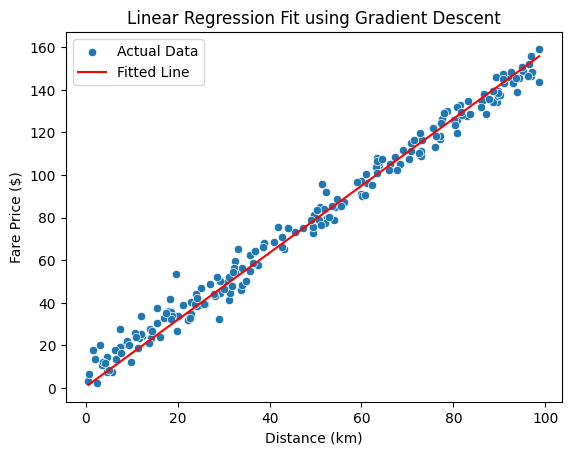

In [10]:
sns.scatterplot(x=distance_array, y=fare_array, label='Actual Data')
x_line = np.linspace(min(distance_array), max(distance_array), 100)
y_line = optimized_weight * x_line + optimized_bias

sns.lineplot(x=x_line, y=y_line, color='red', label='Fitted Line')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Price ($)')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.show()

In [11]:
def predict_fare(x):
    target = prediction(x,optimized_weight, optimized_bias)
    print(f"the fare amount is \"{float(round(target,2))}\" dollars for \"{x}\" kilometers.")

In [12]:
predict_fare(37)

the fare amount is "58.81" dollars for "37" kilometers.
